In [3]:
from random import randint
from random import shuffle
from numpy import random
import matplotlib.pyplot as plt
import time

In [4]:
def pick_next(points, stack):
    for i in points:
        flag = True
        for j in range(0, len(stack)):
            if i == stack[j]:
                flag = False
        if flag:
            return i
        else:
            stack[0]

In [5]:
def check_if_in_stack(point, stack):
    for i in range(1, len(stack)):
        if stack[i] == point:
            return True
    return False

In [6]:
def angle(a, b, c):
    return ((b[0] - a[0]) * (c[1] - a[1])) - ((c[0] - a[0]) * (b[1] - a[1]))

In [7]:
def convex_hull_jarvis(points):
    point = points[0]
    stack = []
    for i in points:
        if i < point:
            point = i        
    back_point = points[0]      
    for i in points:
        if i > back_point:
            back_point = i
    stack.append(point)
    if point == back_point:
        return stack
    next_point = pick_next(points, stack)
    flag = False
    while True:
        if point == back_point:
            flag = True
        linear = []
        for p in points:
            if not check_if_in_stack(p, stack) and p != next_point:
                if angle(point, next_point, p) == 0 and p != stack[0]:
                    linear.append(p)
                if angle(point, next_point, p) > 0:
                    linear = []
                    next_point = p
        if next_point == stack[0]:
            if linear:
                linear.sort(reverse=flag)
                for lin in linear:
                    stack.append(lin)
            break
        if linear:
            linear.append(next_point)
            linear.sort(reverse=flag)
            for lin in linear:
                stack.append(lin)
            point = stack[len(stack)-1]
        else:
            stack.append(next_point)
            point = next_point
        next_point = pick_next(points, stack)
        if next_point == None:
            break
    return stack

In [8]:
def convex_show_normal(number_of_points, distribution_of_X, distribution_of_Y):
    points = []
    for i in range(number_of_points):
        points.append((round(distribution_of_X*(random.normal(size=1)[0])), round(distribution_of_Y*random.normal(size=1)[0])))
    start_time = time.time()
    convex_hull = convex_hull_jarvis(points)
    print("--- %s seconds ---" % (time.time() - start_time))
    hull_x = [p[0] for p in convex_hull]
    hull_y = [p[1] for p in convex_hull]
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x, y)
    plt.scatter(hull_x, hull_y)
    hull_x.append(convex_hull[0][0])
    hull_y.append(convex_hull[0][1])
    plt.plot(hull_x, hull_y, '-r')
    plt.show()

--- 0.046973228454589844 seconds ---


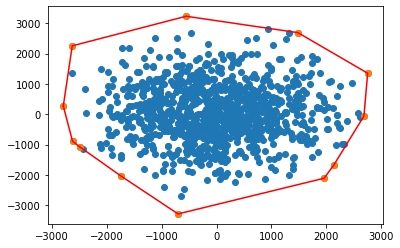

In [9]:
convex_show_normal(1000, 1000, 1000)

## Normal (1000000, 1000000, 1000000) = --- 57.71201539039612 seconds ---
## Normal (100000, 100000, 100000) = --- 5.642762184143066 seconds ---
## Normal (10000, 10000, 10000) = --- 0.442746639251709 seconds ---
## Normal (1000, 1000, 1000) = --- 0.04197549819946289 seconds ---
## Normal (100, 100, 100) = --- 0.00299835205078125 seconds ---

In [15]:
def convex_show_random(number_of_points, distribution_of_X, distribution_of_Y):
    points = []
    for i in range(number_of_points):
        points.append((randint(0, distribution_of_X), (randint(0, distribution_of_Y))))
    start_time = time.time()
    convex_hull = convex_hull_jarvis(points)
    print("--- %s seconds ---" % (time.time() - start_time))
    hull_x = [p[0] for p in convex_hull]
    hull_y = [p[1] for p in convex_hull]
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x, y)
    plt.scatter(hull_x, hull_y)
    hull_x.append(convex_hull[0][0])
    hull_y.append(convex_hull[0][1])
    plt.plot(hull_x, hull_y, '-r')
    plt.show()
    print(len(convex_hull)/len(points))
    print(len(convex_hull))

--- 0.053968191146850586 seconds ---


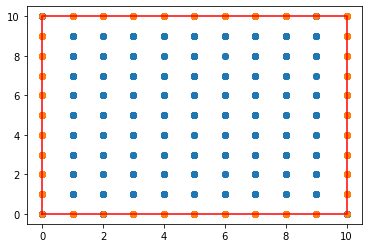

0.29
290


In [23]:
convex_show_random(1000, 10, 10)

## Random (100, 100, 100) = --- 0.0019986629486083984 seconds ---
## Random (1000, 1000, 1000) = --- 0.034980058670043945 seconds ---
## Random (10000, 10000, 10000) = --- 0.7376971244812012 seconds ---
## Random (100000, 100000, 100000) = --- 8.098390102386475 seconds ---
## Random (1000000, 1000000, 1000000) = --- 97.797123670578 seconds ---

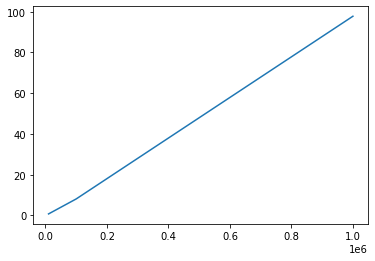

In [365]:
plt.plot([10000, 100000, 1000000], [0.7376971244812012, 8.098390102386475, 97.797123670578])

In [441]:
def convex_show_circle(number_of_points, distribution):
    points = []
    points = PointsInCircum(distribution, number_of_points)
        #points.append((round(distribution_of_X*(random.normal(size=1)[0])), round(distribution_of_Y*random.normal(size=1)[0])))
    start_time = time.time()
    convex_hull = convex_hull_jarvis(points)
    print("--- %s seconds ---" % (time.time() - start_time))
    hull_x = [p[0] for p in convex_hull]
    hull_y = [p[1] for p in convex_hull]
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x, y)
    plt.scatter(hull_x, hull_y)
    hull_x.append(convex_hull[0][0])
    hull_y.append(convex_hull[0][1])
    plt.plot(hull_x, hull_y, '-r')
    plt.show()

--- 144.5973699092865 seconds ---


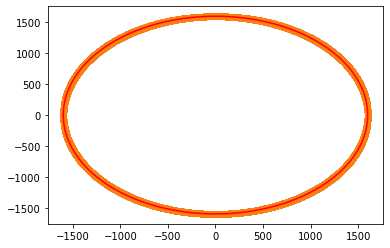

In [452]:
convex_show_circle(1600, 1600)

## Circle
## Circle (100, 100) = --- 0.04496026039123535 seconds ---
## Circle (300, 300) = --- 0.931466817855835 seconds ---
## Circle (600, 600) = --- 7.6496968269348145 seconds ---
## Circle (1000, 1000) = --- 34.161519289016724 seconds ---
## Circle (1250, 1250) = --- 69.34712815284729 seconds ---
## Circle (1400, 1400) = --- 97.1706166267395 seconds ---
## Circle (1600, 1600) = --- 144.5973699092865 seconds ---

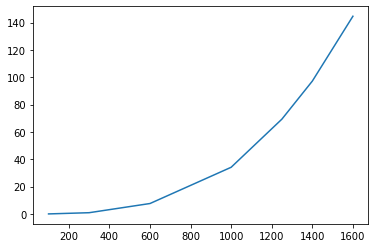

In [453]:
plt.plot([100, 300, 600, 1000, 1250, 1400, 1600], [0.04496026039123535, 0.931466817855835, 7.6496968269348145, 34.161519289016724, 69.34712815284729, 97.1706166267395, 144.5973699092865])

In [461]:
from sklearn.linear_model import LinearRegression
X = [[600*600], [1000*1000], [1400*1400], [1600*1600]]
y = [76496.968269348145, 341615.19289016724, 971706.166267395, 1445973.699092865]
reg = LinearRegression().fit(X, y)
reg.coef_

array([0.62709169])

In [370]:
import math
pi = math.pi

def PointsInCircum(r,n=10):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

In [437]:
PointsInCircum(10, 10)

[(10.0, 0.0),
 (8.090169943749475, 5.877852522924732),
 (3.0901699437494745, 9.510565162951535),
 (-3.0901699437494736, 9.510565162951536),
 (-8.090169943749473, 5.877852522924733),
 (-10.0, 1.2246467991473533e-15),
 (-8.090169943749475, -5.87785252292473),
 (-3.0901699437494754, -9.510565162951535),
 (3.0901699437494723, -9.510565162951536),
 (8.090169943749473, -5.877852522924734),
 (10.0, -2.4492935982947065e-15)]

In [434]:
for i in range(10):
        print((PointsInCircum(100, 1)[1]))

(100.0, -2.4492935982947064e-14)
(100.0, -2.4492935982947064e-14)
(100.0, -2.4492935982947064e-14)
(100.0, -2.4492935982947064e-14)
(100.0, -2.4492935982947064e-14)
(100.0, -2.4492935982947064e-14)
(100.0, -2.4492935982947064e-14)
(100.0, -2.4492935982947064e-14)
(100.0, -2.4492935982947064e-14)
(100.0, -2.4492935982947064e-14)


In [84]:
points = []
for i in range(40):
    points.append((randint(0, 8), randint(0, 8)))

In [1]:
convex_hull = convex_hull_jarvis(points)

NameError: name 'convex_hull_jarvis' is not defined

In [114]:
print((8, 4) < (8, 0))
(5, 0) < (7, 0)
a = [(7, 0), (5, 0)]
a.sort(reverse = True)
a

False


[(7, 0), (5, 0)]

In [124]:
hull_x = [p[0] for p in convex_hull]
hull_y = [p[1] for p in convex_hull]
x = [p[0] for p in points]
y = [p[1] for p in points]

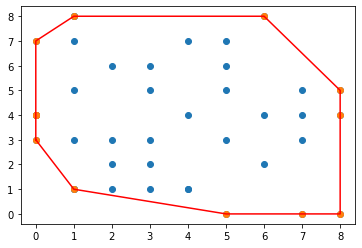

In [125]:
plt.scatter(x, y)
plt.scatter(hull_x, hull_y)
hull_x.append(convex_hull[0][0])
hull_y.append(convex_hull[0][1])
plt.plot(hull_x, hull_y, '-r')
plt.show()